In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Face Mask Detection

/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Face Mask Detection


In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
training_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Face Mask Detection/Dataset/Training Set'
test_path = r'/content/drive/MyDrive/Colab Notebooks/DeepLearning Datasets Jan 31 2022/Face Mask Detection/Dataset/Test Set'

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [7]:
training_set = train_datagen.flow_from_directory(training_path, target_size=(64,64), batch_size = 80, class_mode='binary')
test_set = test_datagen.flow_from_directory(test_path, target_size=(64,64), batch_size = 2027, class_mode='binary')

Found 7192 images belonging to 3 classes.
Found 1800 images belonging to 3 classes.


In [8]:
training_data = next(training_set)

In [9]:
training_data[0].shape

(80, 64, 64, 3)

In [10]:
training_set.class_indices

{'Incorrectly_worn_mask': 0, 'With_mask': 1, 'Without_mask': 2}

Without_mask


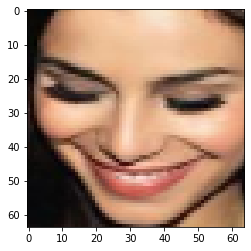

In [11]:
classes = ['Incorrectly worn mask', 'With_mask', 'Without_mask']
plt.imshow(training_data[0][61])

a = training_data[1][61]

print(classes[int(a)])

In [12]:
classifier = Sequential()

classifier.add(Conv2D(32,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(64,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Conv2D(128,3,activation = 'relu', input_shape=(64,64,3)))
classifier.add(MaxPool2D())

classifier.add(Flatten())

classifier.add(Dense(128, activation = 'relu'))

classifier.add(Dense(64, activation = 'relu'))

classifier.add(Dense(32, activation = 'relu'))

classifier.add(Dense(3, activation = 'softmax'))

In [13]:
classifier.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
history = classifier.fit(training_set, epochs = 10, validation_data=test_set)

Epoch 1/10
90/90 [==============================] - 1693s 19s/step - loss: 0.5735 - accuracy: 0.7499 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 2/10
90/90 [==============================] - 73s 810ms/step - loss: 0.2448 - accuracy: 0.9103 - val_loss: 0.2204 - val_accuracy: 0.9233
Epoch 3/10
90/90 [==============================] - 72s 803ms/step - loss: 0.1778 - accuracy: 0.9363 - val_loss: 0.1322 - val_accuracy: 0.9467
Epoch 4/10
90/90 [==============================] - 77s 849ms/step - loss: 0.1299 - accuracy: 0.9520 - val_loss: 0.1310 - val_accuracy: 0.9511
Epoch 5/10
90/90 [==============================] - 76s 841ms/step - loss: 0.1203 - accuracy: 0.9565 - val_loss: 0.0715 - val_accuracy: 0.9772
Epoch 6/10
90/90 [==============================] - 76s 843ms/step - loss: 0.0858 - accuracy: 0.9719 - val_loss: 0.0593 - val_accuracy: 0.9811
Epoch 7/10
90/90 [==============================] - 76s 843ms/step - loss: 0.0682 - accuracy: 0.9782 - val_loss: 0.0593 - val_accuracy: 0.9806

In [14]:
Y_pred_test = classifier.predict(test_set)
Y_pred_test.shape

(1800, 3)

'With_mask'

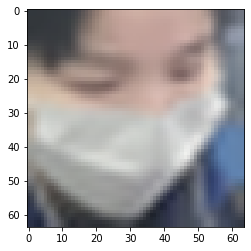

In [15]:
plt.imshow(test_set[0][0][35])
classes[int(test_set[0][1][35])]

In [16]:
print(test_set[0][1][13])
print(Y_pred_test.argmax(axis=1)[13])

2.0
2


In [17]:
print(Y_pred_test.argmax(axis=1)[35])

0


In [18]:
print(f'Accuracy is : {accuracy_score(test_set[0][1], Y_pred_test.argmax(axis=1))}')
print(f'F1 Score is : {f1_score(test_set[0][1], Y_pred_test.argmax(axis=1), average = "weighted")}.')
print(f'Precision is : {precision_score(test_set[0][1], Y_pred_test.argmax(axis=1), average="weighted")}.')
print(f'Recall is : {recall_score(test_set[0][1], Y_pred_test.argmax(axis=1), average = "weighted")}.')


Accuracy is : 0.31833333333333336
F1 Score is : 0.31832369024377183.
Precision is : 0.318335557180083.
Recall is : 0.31833333333333336.


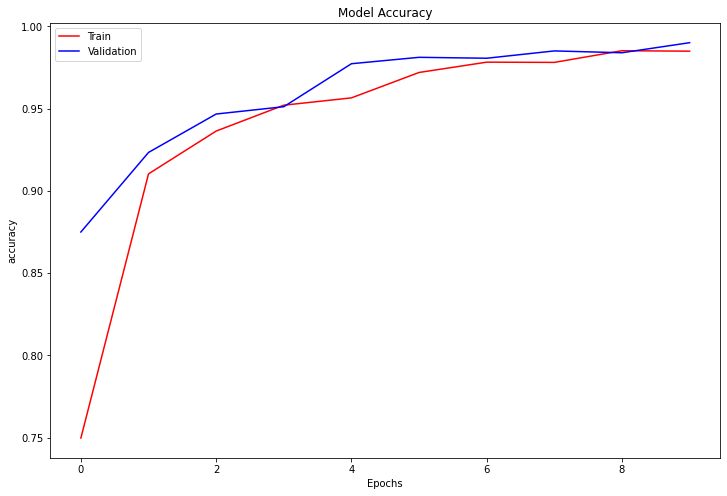

In [19]:
plt.figure(figsize = (12,8))
plt.plot(history.history['accuracy'], color = 'red', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.title('Model Accuracy')
plt.legend()
plt.show()

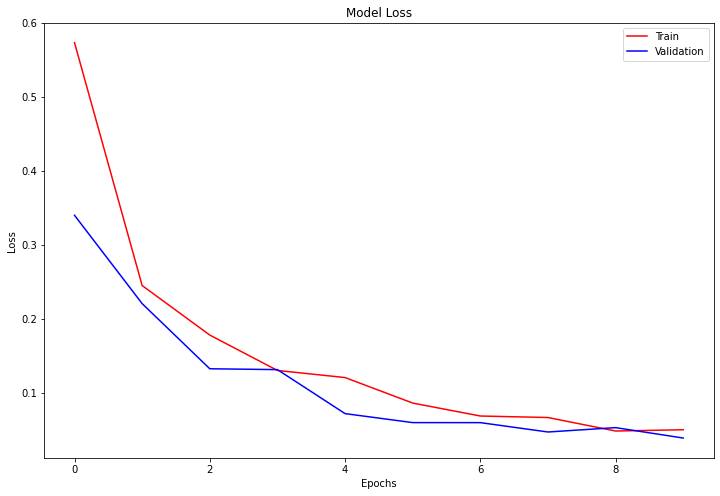

In [20]:
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'], color = 'red', label = 'Train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend()
plt.show()

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [23]:
conf_mat = confusion_matrix(test_set[0][1], Y_pred_test.argmax(axis=1))
print(conf_mat)

[[193 211 196]
 [201 192 207]
 [214 198 188]]


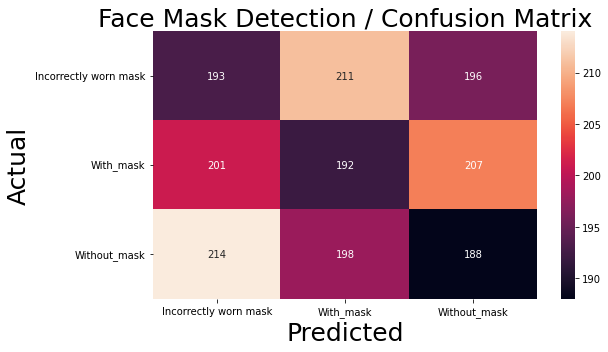

In [35]:
import seaborn as sns

plt.figure(figsize = (9,5))
colormap = sns.color_palette('Blues', 12)
sns.heatmap(conf_mat, annot = True, fmt = 'g')
posx, text_valx = plt.xticks()
posy, text_valy = plt.yticks()




plt.xticks(posx, ['Incorrectly worn mask', 'With_mask', 'Without_mask'], fontsize = 10)
plt.yticks(posy, ['Incorrectly worn mask', 'With_mask', 'Without_mask'], fontsize = 10, rotation = 0, va ='center')
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Actual', fontsize = 25)
plt.title('Face Mask Detection / Confusion Matrix', fontsize = 25)

plt.tight_layout()
plt.show()


In [36]:
classifier.save(r'/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Face Mask Detection/face_mask_detection_98.h5')

In [37]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Face Mask Detection/face_mask_detection_98.h5')

# # read the image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Deep Learning Projects/Face Mask Detection/Images from Web/1ICM.jpg',
                            target_size=(64,64))

# # image to array
test_image = image.img_to_array(test_image)
test_image = image.smart_resize(test_image, (64,64))

test_image = test_image.reshape(1,64,64,3)

result = model.predict(test_image).argmax(axis=1)

print(classes[result[0]])



With_mask
